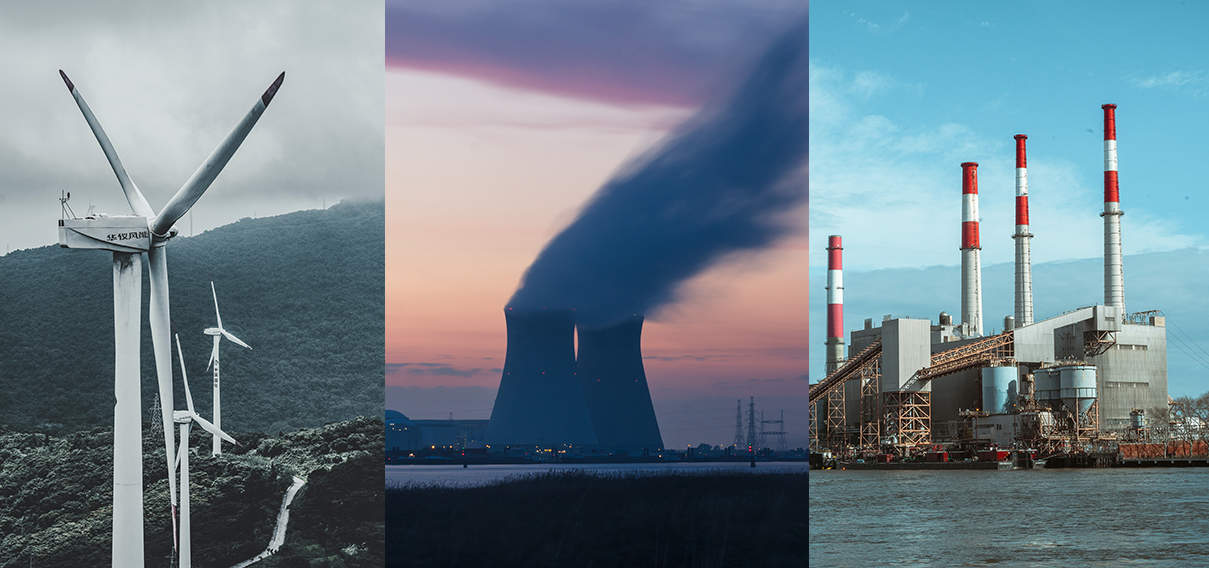

# Capstone Project - World Electricity Generation

## Overview

In this final project, students are tasked with finding their own dataset, performing multilinear regression analysis to find insights and conclusions. This project looks at data on **world electricity generation**, with the aim of providing an insight into some of the factors that affect electricity generation per capita.  

## Data Understanding

The World Energy Consumption dataset was published on kaggle by Pralabh Poudel, and is a collection of key metrics maintained by Our World in Data. This dataset has energy data for every country, with 129 variables. Full information about the dataset can be found in a seperate github link. 

The first step was to dig into the data to do some initial cleaning and decide on the aims of the project. 

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', None)

In [174]:
df = pd.read_csv('World_Energy_Consumption.csv')
df2 = df[df['year'] > 2000]
df2= df2[df2['population'] >= 2000000]

As the dataset was extensive, the project will focus on data from **2001** onwards. Additionally, countries with populations **smaller than 2 million** were excluded to emphasize trends within larger population groups.

Any data that was not about a specific country was also removed.

In [175]:
df2 = df2[~df2['country'].str.contains('\(')]

In [176]:
# items in the countries variable to be removed: 'Lower-middle-income countries', 'Europe', 'Upper-middle-income countries',
#'South America', 'World', 'USSR', 'Oceania', 'North America', 'Low-income countries', 'Africa', 'High-income countries', 
#'Asia','Antarctica'

df2 = df2[~df2['country'].str.contains('\(')]
countries_to_remove = ['Lower-middle-income countries', 'Europe', 'Upper-middle-income countries','South America', 'World', 'USSR', 'Oceania', 'North America', 
                       'Low-income countries', 'Africa', 'High-income countries', 'Asia','Antarctica']

df2 = df2[~df2['country'].isin(countries_to_remove)]

The column **electricity generation** will be used for the linear regression model. There are 129 variables to work with. That number will be  reduced to the ones that could potentially be useful for the regression analysis. 

In [177]:
columns_of_interest= ['country','year', 'iso_code', 'population', 'gdp', 'biofuel_electricity','biofuel_share_elec',
                      'carbon_intensity_elec', 'coal_electricity', 'coal_share_elec', 'coal_production', 'electricity_demand', 
                      'electricity_generation', 'per_capita_electricity', 'fossil_electricity', 'fossil_share_elec', 
                      'gas_electricity', 'gas_share_elec', 'gas_production', 'greenhouse_gas_emissions', 'hydro_electricity', 
                      'hydro_share_elec', 'low_carbon_consumption', 'low_carbon_electricity', 'net_elec_imports', 
                      'nuclear_electricity', 'nuclear_share_elec', 'oil_electricity', 'oil_share_elec', 'oil_production',
                      'renewables_electricity', 'renewables_share_elec', 'solar_electricity', 'solar_share_elec', 
                      'wind_share_elec']
df3 =df2[columns_of_interest]

The number of columns has been brought down to 36. This is a more manageable dataset to work with and explore. As data exploration continues, the dataset will be streamlined further.

In [178]:
#lets plot our model. 
outcome = 'electricity_generation'

#the final variables for the model have been decided upon:
predictors = df3[['year', 'population', 'gdp', 'greenhouse_gas_emissions', 'coal_production', 'net_elec_imports', 
                  'oil_production', 'biofuel_share_elec', 'coal_share_elec', 'gas_share_elec', 'hydro_share_elec', 
                  'nuclear_share_elec', 'oil_share_elec', 'solar_share_elec', 'wind_share_elec']]

pred_sum = '+'.join(predictors)
formula = outcome + '~' + pred_sum

In [179]:
model = ols(formula=formula, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     electricity_generation   R-squared:                       0.994
Model:                                OLS   Adj. R-squared:                  0.994
Method:                     Least Squares   F-statistic:                 2.617e+04
Date:                    Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                            19:51:15   Log-Likelihood:                -11328.
No. Observations:                    2186   AIC:                         2.269e+04
Df Residuals:                        2171   BIC:                         2.277e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -139.2522    434.341     -0.321      0.749    -991.019     712.515
year                         0.0578      0.216      0.268      0.789      -0.366       0.481
population               -2.783e-07   9.86e-09    -28.215      0.000   -2.98e-07   -2.59e-07
gdp                        1.11e-10   2.48e-12     44.797      0.000    1.06e-10    1.16e-10
greenhouse_gas_emissions     1.1953      0.022     54.651      0.000       1.152       1.238
coal_production             -0.0026      0.002     -1.166      0.244      -0.007       0.002
net_elec_imports            -1.6259      0.098    -16.556      0.000      -1.818      -1.433
oil_production               0.0336      0.002     20.719      0.000       0.030       0.037
biofuel_share_elec           0.6931      0.438      1.581      0.114      -0.167       1.553
coal_share_elec             -0.1033      0.255     -0.405      0.686      -0.604       0.397
gas_share_elec              -0.0643      0.253     -0.254      0.800      -0.561       0.433
hydro_share_elec             0.4244      0.255      1.666      0.096      -0.075       0.924
nuclear_share_elec           1.2442      0.258      4.826      0.000       0.739       1.750
oil_share_elec               0.1768      0.255      0.693      0.488      -0.324       0.677
solar_share_elec            -3.4039      1.242     -2.741      0.006      -5.840      -0.968
wind_share_elec              0.8159      0.390      2.093      0.036       0.052       1.580
==============================================================================
Omnibus:                     1482.087   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77612.731
Skew:                           2.566   Prob(JB):                         0.00
Kurtosis:                      31.736   Cond. No.                     9.69e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The initial model has a far too high correlation between electricity generation and GDP to provide any other insight. The second model will investigate electricity generation per capita. 

In [180]:
columns = ['country','year', 'population', 'gdp', 'electricity_generation', 'per_capita_electricity', 'greenhouse_gas_emissions', 'coal_production', 
           'net_elec_imports', 'oil_production', 'biofuel_share_elec', 'coal_share_elec', 'gas_share_elec', 'hydro_share_elec', 
           'nuclear_share_elec', 'oil_share_elec', 'solar_share_elec', 'wind_share_elec']
df5 = df3[columns]

In [181]:
df5.head()

,country,year,population,gdp,electricity_generation,per_capita_electricity,greenhouse_gas_emissions,coal_production,net_elec_imports,oil_production,biofuel_share_elec,coal_share_elec,gas_share_elec,hydro_share_elec,nuclear_share_elec,oil_share_elec,solar_share_elec,wind_share_elec
124,Afghanistan,2001,19688634.0,1.102127e+10,0.59,29.967,0.07,0.151,0.1,0.0,0.0,0.0,0.0,84.746,0.0,15.254,0.0,0.0
125,Afghanistan,2002,21000258.0,1.880487e+10,0.69,32.857,0.10,0.122,0.1,0.0,0.0,0.0,0.0,81.159,0.0,18.841,0.0,0.0
126,Afghanistan,2003,22645136.0,2.107434e+10,0.94,41.510,0.24,0.203,0.1,0.0,0.0,0.0,0.0,67.021,0.0,32.979,0.0,0.0
127,Afghanistan,2004,23553554.0,2.233257e+10,0.89,37.786,0.24,0.197,0.1,0.0,0.0,0.0,0.0,62.921,0.0,37.079,0.0,0.0
128,Afghanistan,2005,24411196.0,2.539769e+10,0.93,38.097,0.25,0.192,0.1,0.0,0.0,0.0,0.0,63.441,0.0,36.559,0.0,0.0


In [182]:
# we already have a column with electricity generation per capita, where units have been converted into kilowatt hours.
#we will rename it to match the rest of the dataset

df5 = df5.rename(columns={'per_capita_electricity': 'electricity_per_capita'})

In [183]:
df5.loc[:, 'gdp_per_capita'] = df5['gdp'] / df5['population']

In [184]:
df5.loc[:, 'greenhouse_gas_emissions_per_capita'] = df5['greenhouse_gas_emissions'] / df5['population']

In [185]:
df5.loc[:, 'oil_production_per_capita'] = df5['oil_production'] / df5['population']

In [186]:
df5.loc[:, 'coal_production_per_capita'] = df5['coal_production'] / df5['population']

In [187]:
df5.loc[:, 'net_elec_imports_per_capita'] = df5['net_elec_imports'] / df5['population']

In [188]:
df6 = df5.drop(['gdp', 'electricity_generation','greenhouse_gas_emissions','coal_production', 
                'net_elec_imports', 'oil_production'], axis=1)

In [189]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3173 entries, 124 to 22011
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3173 non-null   object 
 1   year                                 3173 non-null   int64  
 2   population                           3173 non-null   float64
 3   electricity_per_capita               3157 non-null   float64
 4   biofuel_share_elec                   3121 non-null   float64
 5   coal_share_elec                      3145 non-null   float64
 6   gas_share_elec                       3145 non-null   float64
 7   hydro_share_elec                     3133 non-null   float64
 8   nuclear_share_elec                   3018 non-null   float64
 9   oil_share_elec                       3145 non-null   float64
 10  solar_share_elec                     3157 non-null   float64
 11  wind_share_elec                 

In [190]:
outcome = 'electricity_per_capita'  
predictors = df6.drop(['electricity_per_capita', 'population', 'country'], axis=1)
pred_sum ='+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [191]:
model = ols(formula=formula, data=df6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     electricity_per_capita   R-squared:                       0.829
Model:                                OLS   Adj. R-squared:                  0.828
Method:                     Least Squares   F-statistic:                     752.6
Date:                    Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                            19:51:16   Log-Likelihood:                -19491.
No. Observations:                    2186   AIC:                         3.901e+04
Df Residuals:                        2171   BIC:                         3.910e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            4.428e+04   1.82e+04      2.427      0.015    8494.317    8.01e+04
year                                  -22.4585      9.073     -2.475      0.013     -40.250      -4.667
biofuel_share_elec                     86.1597     18.397      4.683      0.000      50.082     122.238
coal_share_elec                        10.9662     10.800      1.015      0.310     -10.214      32.146
gas_share_elec                         -8.0017     10.649     -0.751      0.452     -28.885      12.881
hydro_share_elec                       17.1676     10.659      1.611      0.107      -3.736      38.071
nuclear_share_elec                     50.7924     10.826      4.692      0.000      29.562      72.022
oil_share_elec                          0.9670     10.690      0.090      0.928     -19.996      21.930
solar_share_elec                      -89.4571     51.466     -1.738      0.082    -190.384      11.470
wind_share_elec                       -37.6680     16.734     -2.251      0.024     -70.485      -4.851
gdp_per_capita                          0.1636      0.004     37.280      0.000       0.155       0.172
greenhouse_gas_emissions_per_capita  4.651e+08   4.85e+07      9.586      0.000     3.7e+08     5.6e+08
oil_production_per_capita            9.578e+06   8.28e+05     11.563      0.000    7.95e+06    1.12e+07
coal_production_per_capita           6.939e+06   3.57e+06      1.942      0.052   -6.76e+04    1.39e+07
net_elec_imports_per_capita         -9.395e+08   4.76e+07    -19.750      0.000   -1.03e+09   -8.46e+08
==============================================================================
Omnibus:                      860.356   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36601.761
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                      22.918   Cond. No.                     2.95e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adjusting the variables to be per capita makes the model more interesting. Our adjusted R squared value is reduced, but it still remains very high at **0.83**. This shows there is a very high correlation between all the variables and the electricity generation per capita. Essentially, 81% of the electricity generation can be explained by our variables.


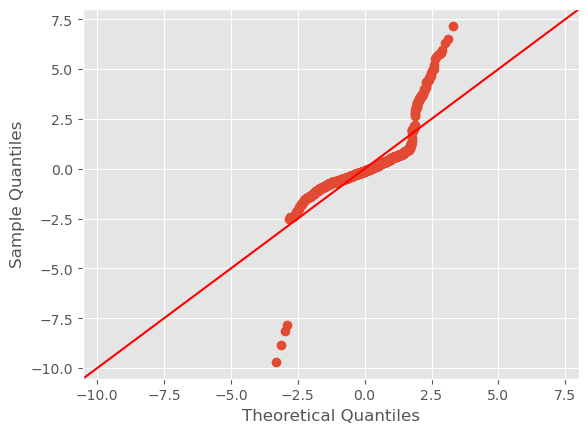

In [192]:
#lets take a look at a QQ plots to analyse the data. 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')


f = outcome + '~' + pred_sum
model = smf.ols(formula=f, data=df6).fit()

resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

The QQ plot seems to be very heavy tailed. This suggests that compared to a normal distribution, there is much more data at the ends of the distribution, and less data in the centre.

JB is very high, which suggests the data does not follow normality.

In the thrid iteration, logarithmic transformation of the non normal data will need to be performed. This should result in a **skewness** and **kurtosis** reduction.

Before the third iteration, some additional data cleaning will need to be performed to remove null values from the dataset.

In [193]:
#Unfortunatly, it looks like the GDP is missing for the dataset for all countries from 2019 - 2022. 
#We will need to reduce the dataset to 2018.

#We also have a 5 countries where we have no GDP data at all. These countries will need to be removed.

missing_GDP = df6['country'][df6['gdp_per_capita'].isnull() & (df6['year'] < 2018) ].unique()
print(f"Countries with missing GDP data: {missing_GDP}")

Countries with missing GDP data: ['Eritrea' 'Papua New Guinea' 'Serbia and Montenegro' 'Somalia'
 'South Sudan' 'Sudan']


In [194]:
#there are a lot of NaN values for oil production in 2018. If a country had 0 oil production in 2017, the 2018 null value will 
#be changed to 0. Otherwise the row will be removed.

filtered_df1 = df6[(df6['year'] == 2016) & (df6['oil_production_per_capita'] != 0)]
filtered_df2 = df6[(df6['year'] == 2017) & (df6['oil_production_per_capita'].isna())]
filtered_df = filtered_df1.merge(filtered_df2, on ='country', how = 'inner')

filtered_df3 = df6[(df6['year'] == 2016) & (df6['oil_production_per_capita'] == 0)]
filtered_df4 = filtered_df3.merge(filtered_df2, on ='country', how = 'inner')

# Get the list of countries
countries_list = filtered_df['country'].unique().tolist()
countries_list2 = filtered_df4['country'].unique().tolist()
print(f"There are {len(countries_list)} countries where oil_production DOES NOT equal 0 in 2016 and is NaN in 2017:")
print(countries_list)
print()
print(f"There are {len(countries_list2)} countries where oil_production DOES equal 0 in 2016 and is NaN in 2017:")
print(countries_list2)

There are 45 countries where oil_production DOES NOT equal 0 in 2016 and is NaN in 2017:
['Albania', 'Austria', 'Bangladesh', 'Belarus', 'Bolivia', 'Bulgaria', 'Cameroon', 'Chile', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czechia', 'Democratic Republic of Congo', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hungary', 'Israel', 'Japan', 'Jordan', 'Kyrgyzstan', 'Lithuania', 'Mauritania', 'Mongolia', 'Morocco', 'Myanmar', 'Netherlands', 'New Zealand', 'Niger', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Poland', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Taiwan', 'Tajikistan', 'Turkey', 'Ukraine']

There are 58 countries where oil_production DOES equal 0 in 2016 and is NaN in 2017:
['Afghanistan', 'Armenia', 'Belgium', 'Benin', 'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Central African Republic', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Eritrea', 'Ethiopia', 'Finland', 'Gambia', 'Guinea', 'Haiti', 'Honduras

For the first list, we need to remove the null rows. For the second list we will make the null values 0.

In [195]:
#removing rows where we do not believe the oil_production is 0 between 2017 and 2022
condition = (~df6['country'].isin(countries_list)) | ((df['year'] < 2017) | (df['year'] > 2022))

# Apply the condition to filter the DataFrame
df6 = df6[condition]

#changing coal_production entries from the countries_list2 between 2017 and 2022 from NaN to 0. 
condition2 = (df6['country'].isin(countries_list2)) & (df['year'].between(2017, 2022))
df6.loc[condition2, 'oil_production_per_capita'] = 0

C:\Users\u\AppData\Local\Temp\ipykernel_10164\2302051025.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df6 = df6[condition]


We repeat this process for coal production:

In [196]:
filtered_coal_df1 = df6[(df6['year'] == 2016) & (df6['coal_production_per_capita'] != 0)]
filtered_coal_df2 = df6[(df6['year'] == 2017) & (df6['coal_production_per_capita'].isna())]
filtered_coal_df = filtered_coal_df1.merge(filtered_coal_df2, on ='country', how = 'inner')

filtered_coal_df3 = df6[(df6['year'] == 2016) & (df6['coal_production_per_capita'] == 0)]
filtered_coal_df4 = filtered_coal_df3.merge(filtered_coal_df2, on ='country', how = 'inner')

# # Get the list of countries
# countries_coal_list = filtered_coal_df['country'].unique().tolist()
# countries_coal_list2 = filtered_coal_df4['country'].unique().tolist()
# print(f"There are {len(countries_coal_list)} countries where coal_production DOES NOT equal 0 in 2016 and is NaN in 2017:")
# print(countries_coal_list)
# print()
# print(f"There are {len(countries_coal_list2)} countries where coal_production DOES equal 0 in 2016 and is NaN in 2017:")
# print(countries_coal_list2)

In [197]:
#removing rows where we do not believe the coal_production is 0 between 2017 and 2022
condition3 = (~df6['country'].isin(countries_coal_list)) & ((df['year'] < 2017) | (df['year'] > 2022))

# Apply the condition to filter the DataFrame
df6 = df6[condition]

#changing coal_production entries from the countries_coal_list2 between 2017 and 2022 from NaN to 0. 
condition4 = (df6['country'].isin(countries_coal_list2)) & (df['year'].between(2017, 2022))
df6.loc[condition4, 'coal_production_per_capita'] = 0

C:\Users\u\AppData\Local\Temp\ipykernel_10164\485463208.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df6 = df6[condition]


In [198]:
df6 = df6[df6['year'] < 2019]
df6 = df6[~df6['country'].isin(missing_GDP)]
df6 = df6[~df6['coal_production_per_capita'].isnull()]
df6['biofuel_share_elec'].fillna(0, inplace=True)
df6['hydro_share_elec'].fillna(0, inplace=True)
df6['nuclear_share_elec'].fillna(0, inplace=True)

In [199]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421 entries, 124 to 22007
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              2421 non-null   object 
 1   year                                 2421 non-null   int64  
 2   population                           2421 non-null   float64
 3   electricity_per_capita               2421 non-null   float64
 4   biofuel_share_elec                   2421 non-null   float64
 5   coal_share_elec                      2421 non-null   float64
 6   gas_share_elec                       2421 non-null   float64
 7   hydro_share_elec                     2421 non-null   float64
 8   nuclear_share_elec                   2421 non-null   float64
 9   oil_share_elec                       2421 non-null   float64
 10  solar_share_elec                     2421 non-null   float64
 11  wind_share_elec                 

All null values have been removed from the data frame. There are now **2421 rows** to work with from **145 countries**. 

The next step will be to log transform and scale the data. 

In [200]:
#net_elec_imports has negative numbers, these will need to be made positive so they work with a log transform
#the solution is to add a constant to all the values
df6['net_elec_imports_per_capita'] = df6['net_elec_imports_per_capita'] - min(df6['net_elec_imports_per_capita'])

In [201]:
#columns to log: electricity_per_capita, gdp, net electric imports, coal_production, oil productiongreenhouse gas emissions
to_be_logged = ['gdp_per_capita', 'electricity_per_capita', 'net_elec_imports_per_capita', 'coal_production_per_capita',
       'oil_production_per_capita', 'greenhouse_gas_emissions_per_capita' ]

df6['net_elec_imports_per_capita'] = df6['net_elec_imports_per_capita'] + min(df6['net_elec_imports_per_capita'])
#making columns with 0 numbers non zero by adding 1e-10, so the variables can be log transformed
df_log = df6[to_be_logged] + 1e-10

#preforming log transformation
log_names = [f'{column}_log' for column in df_log.columns]

df_log = np.log(df_log)
df_log.columns = log_names

In [202]:
df_log.head()

,gdp_per_capita_log,electricity_per_capita_log,net_elec_imports_per_capita_log,coal_production_per_capita_log,oil_production_per_capita_log,greenhouse_gas_emissions_per_capita_log
124,6.327541,3.400097,-11.681948,-18.673073,-23.025851,-19.427074
125,6.797336,3.492165,-11.681986,-18.946713,-23.025851,-19.141848
126,6.835867,3.725934,-11.682027,-18.518911,-23.025851,-18.353181
127,6.854525,3.631939,-11.682047,-18.587454,-23.025851,-18.392137
128,6.947372,3.640136,-11.682065,-18.648178,-23.025851,-18.387130


Now we have logged our variables, the next step is to scale them: 

In [203]:
gdp_per_capita_log = df_log['gdp_per_capita_log']
electricity_per_capita_log = df_log['electricity_per_capita_log']
net_elec_imports_per_capita_log = df_log['net_elec_imports_per_capita_log']
coal_production_per_capita_log = df_log['coal_production_per_capita_log']
oil_production_per_capita_log = df_log['oil_production_per_capita_log']
greenhouse_gas_emissions_per_capita_log = df_log['greenhouse_gas_emissions_per_capita_log']

#min-max scaling the variables
scaled_gdp_per_capita = (gdp_per_capita_log - min(gdp_per_capita_log)) / (max(gdp_per_capita_log) - min(gdp_per_capita_log))
scaled_electricity_per_capita = (electricity_per_capita_log - min(electricity_per_capita_log)) / (max(electricity_per_capita_log) - min(electricity_per_capita_log))
scaled_net_elec_imports_per_capita = (net_elec_imports_per_capita_log - min(net_elec_imports_per_capita_log)) / (max(net_elec_imports_per_capita_log) - min(net_elec_imports_per_capita_log))
scaled_coal_production_per_capita = (coal_production_per_capita_log - np.mean(coal_production_per_capita_log)) / (max(coal_production_per_capita_log) - min(coal_production_per_capita_log))
scaled_oil_production_per_capita_log = (oil_production_per_capita_log - min(oil_production_per_capita_log)) / (max(oil_production_per_capita_log) - min(oil_production_per_capita_log))
scaled_greenhouse_gas_emissions_per_capita_log = (greenhouse_gas_emissions_per_capita_log - min(greenhouse_gas_emissions_per_capita_log)) / (max(greenhouse_gas_emissions_per_capita_log) - min(greenhouse_gas_emissions_per_capita_log))

df_scaled = pd.DataFrame([])
df_scaled['electricity_per_capita_log'] = scaled_electricity_per_capita
df_scaled['gdp_per_capita_log'] = scaled_gdp_per_capita
df_scaled['net_elec_imports_per_capita_log'] = scaled_net_elec_imports_per_capita
df_scaled['coal_production_per_capita_log'] = scaled_coal_production_per_capita
df_scaled['oil_production_per_capita_log'] = scaled_oil_production_per_capita_log
df_scaled['greenhouse_gas_emissions_per_capita_log'] = scaled_greenhouse_gas_emissions_per_capita_log

In [204]:
#removing the non logged and scaled variables from the data frame, to be replaced with df_scaled
df7 = df6.drop(['gdp_per_capita','electricity_per_capita','net_elec_imports_per_capita',
                'coal_production_per_capita', 'oil_production_per_capita', 
                'greenhouse_gas_emissions_per_capita'], axis = 1)

df7 = pd.concat([df_scaled, df7], axis=1)

Our next task is to check for any colineararity. We will aim to find highly correlated variables and remove them from the model. If we do not, we risk small changes to the model causing big fluctuations, making the model less reliable.

In [205]:
#save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_dropped = df7.drop(['electricity_per_capita_log', 'country'], axis = 1)
df_corr=df_dropped.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#drop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
df_corr.drop_duplicates(inplace=True)

In [206]:
df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

,cc
pairs,
"(greenhouse_gas_emissions_per_capita_log, gdp_per_capita_log)",0.862673


We see that **greenhouse_gas_emissions_per_capita_log** and **gdp_per_capita_log** are highly correlated. We will need to remove one of these variables. 

The third iteration of our model is ready to be plotted:

In [207]:
outcome = 'electricity_per_capita_log'  
predictors = df7.drop(['electricity_per_capita_log', 'gdp_per_capita_log', 'population', 'country'], axis=1)
pred_sum ='+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [208]:
model = ols(formula=formula, data=df6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     electricity_per_capita_log   R-squared:                       0.963
Model:                                    OLS   Adj. R-squared:                  0.963
Method:                         Least Squares   F-statistic:                     4787.
Date:                        Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                                19:51:17   Log-Likelihood:                -938.58
No. Observations:                        2421   AIC:                             1905.
Df Residuals:                            2407   BIC:                             1986.
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  13.5246      3.220      4.201      0.000       7.211      19.838
net_elec_imports_per_capita_log            -0.2097      0.023     -9.298      0.000      -0.254      -0.165
coal_production_per_capita_log             -0.0148      0.002     -6.531      0.000      -0.019      -0.010
oil_production_per_capita_log              -0.0002      0.002     -0.133      0.894      -0.004       0.003
greenhouse_gas_emissions_per_capita_log     0.9214      0.005    169.827      0.000       0.911       0.932
year                                        0.0025      0.002      1.559      0.119      -0.001       0.006
biofuel_share_elec                         -0.0250      0.003     -7.307      0.000      -0.032      -0.018
coal_share_elec                            -0.0152      0.002     -7.894      0.000      -0.019      -0.011
gas_share_elec                             -0.0095      0.002     -4.948      0.000      -0.013      -0.006
hydro_share_elec                            0.0102      0.002      5.326      0.000       0.006       0.014
nuclear_share_elec                          0.0088      0.002      4.554      0.000       0.005       0.013
oil_share_elec                             -0.0174      0.002     -9.064      0.000      -0.021      -0.014
solar_share_elec                           -0.0132      0.007     -1.819      0.069      -0.028       0.001
wind_share_elec                             0.0125      0.003      4.404      0.000       0.007       0.018
==============================================================================
Omnibus:                      689.208   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3942.987
Skew:                           1.221   Prob(JB):                         0.00
Kurtosis:                       8.755   Cond. No.                     8.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

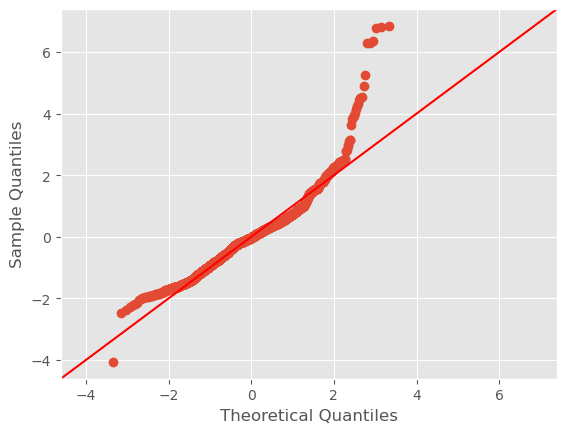

In [209]:
#lets take a look at a QQ plot to analyse the data. 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')


f = outcome + '~' + pred_sum
model = smf.ols(formula=f, data=df7).fit()

resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

Our QQ plot shows a lot of improvement on the previous model. The data frame looks to be far more normalised.

Now we have completed our regression model, we need to move on to **model testing**.

Model testing is crucial for assessing the reliability and effectiveness of a multilinear regression model and ensuring its applicability to new data.

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


linreg = LinearRegression()

In [211]:
outcome = df7['electricity_per_capita_log']
cv_scores = cross_val_score(linreg, predictors, outcome, cv=10)

In [212]:
print("Cross-validation scores:", cv_scores)
print()
# Calculate and print the mean and standard deviation of the scores
print("Mean CV score:", np.mean(cv_scores))
print()
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [0.97075261 0.92697884 0.9562738  0.95909553 0.9243292  0.95150879
 0.95741054 0.9684186  0.95650262 0.9576737 ]

Mean CV score: 0.9528944246375092

Standard deviation of CV scores: 0.01468180667348589


With a very low standard deviation of 0.01, this indicates that the model is consistent across different sections of the data. 

The final step will be to train and test the data, to see if the model is underfitted or overfitted.

In [213]:
# our final step will be to train and test the data, to see if our model is underfitted or overfitted
from sklearn.model_selection import train_test_split

y = df7['electricity_per_capita_log']
X = predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [215]:
#Look at the residuals and calculate the MSE for training and test sets:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.0016650031967961763
Test Mean Squared Error: 0.0018631914726620726


This is a great result! We have a very low MSE for both the train and the test set, showing that the model fits well and is neither under or over fitted. We can be confident that our model will work on future data. 

## Conclusions

There are a number of interesting conclusions we can draw from our model: 

***Greenhouse gas emissions per capita*** and **GDP per capita** are very highly correlated with electricity generated per capita. Unfortunaely our electricity is still highly reliant on carbon emitting resources. The more electricity a country provides per person, the more co2 is emmitted. Countries with low carbon emissions lack access to electricity, this is one of the key problems we face in reducing our emissions. Can we raise low income countries out of poverty, without increasing their greenhouse gas emisisons?

**Oil production** doesn't seem to impact the energy generated per capita, with a high p-value, we cannot reject the null hypothesis that oil production has no affect on electricity generation. **Coal production**, however, does impact. The more a countries' coal output per capita, the less electricity it generates per capita. This may be because coal production is an outdated form of electricity production, and more developed countries have moved away from it. Oil is produced by both wealthy and poor countries, and is not exclusively used for electricity generation, this may be the reason it has no affect on our model.  

The **year** seems to have no impact on electricity gerenation per person. This is a surprise, as one would expect there to be an overall increase in energy by year. By the early 2000's, developed countries with a high gdp per capita, have reached a plateau in energy needed per person.

Interestingly, the share of a countries' energy production by type seems to have a correlation on energy generation.

The higher the percentage of **hydro**, **nuclear** and **wind** generation, the **higher the total energy generation**.

The higher the percentage of **oil**, **coal**, **biofuel** and **gas** generation, the **lower the total energy production**.

This could be because more developed countries, with a higher gdp per capita, are usually further along the transition to low carbon energy. Perhaps hydro, nuclear and wind all imply a greater diversity of energy types. Fossil fuels prices fluctuate with demand so diversifying how your energy is produced helps to limit the impact of this fluctuation. 

## Next Steps

Our regression model has produced some interesting insights into electricity production worldwide. There is a lot of data missing from 2019 onwards. Once the dataset has been updated, it would be great to update the model. 

We have barely scratched the surface of what we can explore with this dataset. I would love to take a deeper dive into the different energy sources and the share of electricity produced. Does diversifying how you are producing energy increase supply? Which ways of producing energy improve affordability? Are there specific regions or countries where diversification of energy sources has led to significant improvements in electricity generation? Are there trade-offs between affordability and environmental sustainability when considering different energy sources for electricity production?

These are all questions we could explore further through this dataset. 